In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from londonbss.ml_logic.main import preprocess, train, evaluate
from londonbss.ml_logic.features  import get_raw_features
from londonbss.ml_logic.registry import load_model
from londonbss.ml_logic.preproc import fit_transform_features
from londonbss.ml_logic.model import test_adf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from londonbss.params import *


Loading TensorFlow...


2023-09-06 03:12:18.312542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 03:12:18.468581: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-06 03:12:19.101382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-06 03:12:19.101489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 


✅ TensorFlow loaded (1.97s)


In [ ]:
y,X = preprocess(min_date='2020-01-01', max_date='2023-01-01')

In [3]:
stations = ["hop_exchange__the_borough",
"st_jamess_square__st_jamess",
"holborn_circus__holborn",
"queen_street_1__bank",
"brushfield_street__liverpool_street",
"whitehall_place__strand",
"soho_square___soho",
"newgate_street___st_pauls",
"queen_street_2__bank",
"st_bride_street__holborn",
"william_iv_street__strand",
"green_park_station__mayfair",
"jubilee_gardens__south_bank",
"little_argyll_street__west_end",
"pall_mall_east__west_end",
"cheapside__bank",
"finsbury_circus__liverpool_street",
"waterloo_station_2__waterloo",
"lancaster_gate___bayswater",
"boston_place__marylebone",
"cloudesley_road__angel",
"knightsbridge__hyde_park",
"bayswater_road__hyde_park",
"wenlock_road___hoxton",
"eagle_wharf_road__hoxton",
"macclesfield_rd__st_lukes",
"st_johns_wood_church__the_regents_park",
"doric_way___somers_town",
"notting_hill_gate_station__notting_hill",
"claremont_square__angel",
"st_johns_wood_road__st_johns_wood",
"river_street___clerkenwell",
"city_road__angel",
"hardwick_street__clerkenwell"
]

In [4]:
for station in stations:
    print(f'Processing Model from station: {station}')
    train(min_date='2020-01-01', max_date='2023-01-01',station=station)
    pred , actual = evaluate(min_date='2020-01-01', max_date='2023-01-01',station='hoxton_street__hoxton')
    

Processing Model from station: hop_exchange__the_borough

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_hop_exchange__the_borough_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_hop_exchange__the_borough_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_test_hop_exchange__the_borough_full_data_4...:
✅ Data saved to bigquery, with shape (4316, 24)

✅ Date Merged Done
Shape of Training dataset : X = (17518, 1) y = (17518, 23)
Shape of Validation dataset : X = (4295, 1) y = (4295, 23)
Shape of Test dataset : X = (4316, 1) y = (4316, 23)

✅ Strong evidence against Null Hyp

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57868D+00    |proj g|=  1.36817D-01


 This problem is unconstrained.



At iterate    5    f=  1.54918D+00    |proj g|=  1.60900D-01

At iterate   10    f=  1.53518D+00    |proj g|=  8.65601D-02

At iterate   15    f=  1.52613D+00    |proj g|=  2.64481D-02

At iterate   20    f=  1.52515D+00    |proj g|=  6.98171D-02

At iterate   25    f=  1.52445D+00    |proj g|=  2.45426D-02

At iterate   30    f=  1.52242D+00    |proj g|=  4.53534D-02

At iterate   35    f=  1.52108D+00    |proj g|=  5.49574D-02

At iterate   40    f=  1.51909D+00    |proj g|=  8.33726D-02

At iterate   45    f=  1.51676D+00    |proj g|=  7.64573D-03

At iterate   50    f=  1.51639D+00    |proj g|=  3.72810D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: st_jamess_square__st_jamess

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_st_jamess_square__st_jamess_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_st_jamess_square__st_jamess_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save d

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22159D+00    |proj g|=  3.34299D-02


 This problem is unconstrained.



At iterate    5    f=  2.21934D+00    |proj g|=  3.05237D-02

At iterate   10    f=  2.21698D+00    |proj g|=  1.40282D-03

At iterate   15    f=  2.21690D+00    |proj g|=  2.76058D-03

At iterate   20    f=  2.21674D+00    |proj g|=  4.29013D-03

At iterate   25    f=  2.21668D+00    |proj g|=  4.21961D-03

At iterate   30    f=  2.21554D+00    |proj g|=  8.69488D-03

At iterate   35    f=  2.21536D+00    |proj g|=  2.20698D-03

At iterate   40    f=  2.21529D+00    |proj g|=  7.98971D-04

At iterate   45    f=  2.21528D+00    |proj g|=  3.79108D-04

At iterate   50    f=  2.21524D+00    |proj g|=  2.18676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: holborn_circus__holborn

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_holborn_circus__holborn_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_holborn_circus__holborn_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQu

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90722D+00    |proj g|=  4.16790D-02


 This problem is unconstrained.



At iterate    5    f=  2.90533D+00    |proj g|=  9.59420D-03

At iterate   10    f=  2.90484D+00    |proj g|=  3.31557D-04

At iterate   15    f=  2.90481D+00    |proj g|=  1.73850D-03

At iterate   20    f=  2.90474D+00    |proj g|=  1.98073D-04

At iterate   25    f=  2.90472D+00    |proj g|=  5.21229D-04

At iterate   30    f=  2.90460D+00    |proj g|=  4.36900D-03

At iterate   35    f=  2.90456D+00    |proj g|=  4.66955D-04

At iterate   40    f=  2.90449D+00    |proj g|=  3.49719D-03

At iterate   45    f=  2.90438D+00    |proj g|=  6.06892D-04

At iterate   50    f=  2.90430D+00    |proj g|=  6.69587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: queen_street_1__bank

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_queen_street_1__bank_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_queen_street_1__bank_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wag

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61776D+00    |proj g|=  4.79892D-02


 This problem is unconstrained.



At iterate    5    f=  2.61481D+00    |proj g|=  9.49642D-03

At iterate   10    f=  2.61401D+00    |proj g|=  3.83652D-03

At iterate   15    f=  2.61398D+00    |proj g|=  1.88277D-03

At iterate   20    f=  2.61393D+00    |proj g|=  1.35617D-03

At iterate   25    f=  2.61382D+00    |proj g|=  3.80408D-04

At iterate   30    f=  2.61368D+00    |proj g|=  1.13371D-03

At iterate   35    f=  2.61363D+00    |proj g|=  5.96308D-04

At iterate   40    f=  2.61330D+00    |proj g|=  1.65178D-03

At iterate   45    f=  2.61304D+00    |proj g|=  9.42434D-05

At iterate   50    f=  2.61304D+00    |proj g|=  2.96649D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: brushfield_street__liverpool_street

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_brushfield_street__liverpool_street_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_brushfield_street__liverpool_street_full_data_4...:
✅ Data saved to bigquery, with 

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99108D+00    |proj g|=  1.07741D-01


 This problem is unconstrained.



At iterate    5    f=  1.98030D+00    |proj g|=  3.78268D-02

At iterate   10    f=  1.96155D+00    |proj g|=  7.60549D-02

At iterate   15    f=  1.95800D+00    |proj g|=  8.78516D-03

At iterate   20    f=  1.95640D+00    |proj g|=  9.61165D-03

At iterate   25    f=  1.95543D+00    |proj g|=  4.39151D-02

At iterate   30    f=  1.95371D+00    |proj g|=  3.00533D-02

At iterate   35    f=  1.95313D+00    |proj g|=  3.45646D-02

At iterate   40    f=  1.95190D+00    |proj g|=  1.49870D-02

At iterate   45    f=  1.95075D+00    |proj g|=  4.64432D-02

At iterate   50    f=  1.95041D+00    |proj g|=  1.42914D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: whitehall_place__strand

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_whitehall_place__strand_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_whitehall_place__strand_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQu

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92124D+00    |proj g|=  2.93760D-02


 This problem is unconstrained.



At iterate    5    f=  1.91159D+00    |proj g|=  9.79334D-03

At iterate   10    f=  1.91098D+00    |proj g|=  1.92560D-03

At iterate   15    f=  1.91079D+00    |proj g|=  2.87659D-03

At iterate   20    f=  1.91058D+00    |proj g|=  1.62446D-03

At iterate   25    f=  1.91027D+00    |proj g|=  3.01057D-02

At iterate   30    f=  1.90900D+00    |proj g|=  4.82114D-03

At iterate   35    f=  1.90896D+00    |proj g|=  3.40603D-03

At iterate   40    f=  1.90892D+00    |proj g|=  1.30066D-03

At iterate   45    f=  1.90886D+00    |proj g|=  1.36917D-03

At iterate   50    f=  1.90881D+00    |proj g|=  2.04963D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: soho_square___soho

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_soho_square___soho_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_soho_square___soho_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wagon-boo

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09291D+00    |proj g|=  5.51593D-02


 This problem is unconstrained.



At iterate    5    f=  2.09029D+00    |proj g|=  2.32103D-02

At iterate   10    f=  2.08587D+00    |proj g|=  5.11730D-03

At iterate   15    f=  2.08574D+00    |proj g|=  5.98329D-03

At iterate   20    f=  2.08566D+00    |proj g|=  1.72421D-02

At iterate   25    f=  2.08559D+00    |proj g|=  1.01437D-03

At iterate   30    f=  2.08521D+00    |proj g|=  1.59999D-02

At iterate   35    f=  2.08477D+00    |proj g|=  1.73458D-03

At iterate   40    f=  2.08474D+00    |proj g|=  2.82723D-03

At iterate   45    f=  2.08469D+00    |proj g|=  1.05306D-03

At iterate   50    f=  2.08468D+00    |proj g|=  3.13963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: newgate_street___st_pauls

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_newgate_street___st_pauls_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_newgate_street___st_pauls_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52072D+00    |proj g|=  5.61572D-02


 This problem is unconstrained.



At iterate    5    f=  2.51808D+00    |proj g|=  1.54312D-02

At iterate   10    f=  2.51638D+00    |proj g|=  6.81510D-04

At iterate   15    f=  2.51637D+00    |proj g|=  6.64851D-04

At iterate   20    f=  2.51635D+00    |proj g|=  1.29438D-03

At iterate   25    f=  2.51628D+00    |proj g|=  3.52212D-03

At iterate   30    f=  2.51626D+00    |proj g|=  2.02096D-03

At iterate   35    f=  2.51613D+00    |proj g|=  1.50461D-03

At iterate   40    f=  2.51609D+00    |proj g|=  1.79479D-03

At iterate   45    f=  2.51593D+00    |proj g|=  4.81796D-03

At iterate   50    f=  2.51590D+00    |proj g|=  8.88346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: queen_street_2__bank

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_queen_street_2__bank_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_queen_street_2__bank_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wag

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52278D+00    |proj g|=  3.38516D-02


 This problem is unconstrained.



At iterate    5    f=  2.52176D+00    |proj g|=  2.21330D-03

At iterate   10    f=  2.52149D+00    |proj g|=  4.48246D-04

At iterate   15    f=  2.52148D+00    |proj g|=  7.48312D-04

At iterate   20    f=  2.52146D+00    |proj g|=  1.41514D-03

At iterate   25    f=  2.52145D+00    |proj g|=  7.46033D-04

At iterate   30    f=  2.52140D+00    |proj g|=  8.03716D-04

At iterate   35    f=  2.52130D+00    |proj g|=  2.97149D-03

At iterate   40    f=  2.52125D+00    |proj g|=  5.53816D-04

At iterate   45    f=  2.52124D+00    |proj g|=  1.03659D-03

At iterate   50    f=  2.52122D+00    |proj g|=  3.17154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: st_bride_street__holborn

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_st_bride_street__holborn_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_st_bride_street__holborn_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to Bi

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86940D+00    |proj g|=  6.35522D-02


 This problem is unconstrained.



At iterate    5    f=  2.86103D+00    |proj g|=  4.56205D-02

At iterate   10    f=  2.85663D+00    |proj g|=  4.36695D-02

At iterate   15    f=  2.85194D+00    |proj g|=  9.88204D-03

At iterate   20    f=  2.85156D+00    |proj g|=  1.05340D-03

At iterate   25    f=  2.85148D+00    |proj g|=  6.55480D-03

At iterate   30    f=  2.85125D+00    |proj g|=  4.39309D-03

At iterate   35    f=  2.85120D+00    |proj g|=  2.69020D-03

At iterate   40    f=  2.85118D+00    |proj g|=  4.97289D-03

At iterate   45    f=  2.85094D+00    |proj g|=  2.12264D-03

At iterate   50    f=  2.85089D+00    |proj g|=  1.06909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: william_iv_street__strand

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_william_iv_street__strand_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_william_iv_street__strand_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96843D+00    |proj g|=  2.53117D-01


 This problem is unconstrained.



At iterate    5    f=  1.94990D+00    |proj g|=  1.94569D-02

At iterate   10    f=  1.94751D+00    |proj g|=  3.25000D-03

At iterate   15    f=  1.94714D+00    |proj g|=  1.22003D-02

At iterate   20    f=  1.94569D+00    |proj g|=  5.63425D-03

At iterate   25    f=  1.94518D+00    |proj g|=  4.57134D-02

At iterate   30    f=  1.94327D+00    |proj g|=  4.77355D-02

At iterate   35    f=  1.94239D+00    |proj g|=  2.33078D-02

At iterate   40    f=  1.94195D+00    |proj g|=  7.79974D-03

At iterate   45    f=  1.94162D+00    |proj g|=  3.11745D-03

At iterate   50    f=  1.94085D+00    |proj g|=  3.77912D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: green_park_station__mayfair

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_green_park_station__mayfair_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_green_park_station__mayfair_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save d

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37074D+00    |proj g|=  8.98735D-02


 This problem is unconstrained.



At iterate    5    f=  2.36669D+00    |proj g|=  1.77519D-02

At iterate   10    f=  2.36323D+00    |proj g|=  3.94545D-03

At iterate   15    f=  2.36312D+00    |proj g|=  2.74535D-03

At iterate   20    f=  2.36300D+00    |proj g|=  6.59436D-03

At iterate   25    f=  2.36238D+00    |proj g|=  1.29260D-02

At iterate   30    f=  2.36218D+00    |proj g|=  1.51487D-03

At iterate   35    f=  2.36162D+00    |proj g|=  5.54763D-03

At iterate   40    f=  2.36146D+00    |proj g|=  3.58308D-03

At iterate   45    f=  2.36113D+00    |proj g|=  1.71692D-03

At iterate   50    f=  2.36102D+00    |proj g|=  1.17731D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: jubilee_gardens__south_bank

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_jubilee_gardens__south_bank_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_jubilee_gardens__south_bank_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save d

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55185D+00    |proj g|=  1.05773D-01


 This problem is unconstrained.



At iterate    5    f=  1.55126D+00    |proj g|=  6.59646D-03

At iterate   10    f=  1.55089D+00    |proj g|=  1.47322D-02

At iterate   15    f=  1.55035D+00    |proj g|=  5.02616D-03

At iterate   20    f=  1.54799D+00    |proj g|=  5.56552D-03

At iterate   25    f=  1.54760D+00    |proj g|=  7.59939D-03

At iterate   30    f=  1.54736D+00    |proj g|=  5.93603D-03

At iterate   35    f=  1.54706D+00    |proj g|=  6.28907D-03

At iterate   40    f=  1.54695D+00    |proj g|=  5.74159D-03

At iterate   45    f=  1.54668D+00    |proj g|=  2.19981D-03

At iterate   50    f=  1.54656D+00    |proj g|=  1.39858D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: little_argyll_street__west_end

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_little_argyll_street__west_end_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_little_argyll_street__west_end_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85915D+00    |proj g|=  3.60359D-01


 This problem is unconstrained.



At iterate    5    f=  1.84582D+00    |proj g|=  1.80489D-02

At iterate   10    f=  1.84394D+00    |proj g|=  2.91454D-03

At iterate   15    f=  1.84333D+00    |proj g|=  8.71491D-03

At iterate   20    f=  1.84317D+00    |proj g|=  1.95605D-03

At iterate   25    f=  1.84266D+00    |proj g|=  1.63558D-02

At iterate   30    f=  1.84225D+00    |proj g|=  1.93016D-02

At iterate   35    f=  1.84202D+00    |proj g|=  1.20149D-02

At iterate   40    f=  1.84177D+00    |proj g|=  2.46829D-02

At iterate   45    f=  1.84139D+00    |proj g|=  5.04576D-03

At iterate   50    f=  1.84119D+00    |proj g|=  3.25472D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: pall_mall_east__west_end

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_pall_mall_east__west_end_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_pall_mall_east__west_end_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to Bi

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03741D+00    |proj g|=  1.49682D-01


 This problem is unconstrained.



At iterate    5    f=  2.02007D+00    |proj g|=  1.72365D-02

At iterate   10    f=  2.01801D+00    |proj g|=  2.74647D-03

At iterate   15    f=  2.01759D+00    |proj g|=  1.26680D-02

At iterate   20    f=  2.01690D+00    |proj g|=  2.96162D-03

At iterate   25    f=  2.01663D+00    |proj g|=  3.83601D-02

At iterate   30    f=  2.01541D+00    |proj g|=  3.54618D-02

At iterate   35    f=  2.01427D+00    |proj g|=  7.02979D-03

At iterate   40    f=  2.01388D+00    |proj g|=  9.88836D-03

At iterate   45    f=  2.01254D+00    |proj g|=  3.73873D-02

At iterate   50    f=  2.01225D+00    |proj g|=  3.59174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: cheapside__bank

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_cheapside__bank_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_cheapside__bank_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wagon-bootcamp-396

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47070D+00    |proj g|=  5.95671D-02


 This problem is unconstrained.



At iterate    5    f=  2.46584D+00    |proj g|=  1.91952D-02

At iterate   10    f=  2.45087D+00    |proj g|=  4.21192D-02

At iterate   15    f=  2.44807D+00    |proj g|=  3.13898D-03

At iterate   20    f=  2.44784D+00    |proj g|=  6.90879D-03

At iterate   25    f=  2.44721D+00    |proj g|=  6.74814D-03

At iterate   30    f=  2.44704D+00    |proj g|=  1.09146D-02

At iterate   35    f=  2.44695D+00    |proj g|=  1.27957D-02

At iterate   40    f=  2.44635D+00    |proj g|=  1.57784D-02

At iterate   45    f=  2.44619D+00    |proj g|=  2.64084D-03

At iterate   50    f=  2.44558D+00    |proj g|=  3.89195D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: finsbury_circus__liverpool_street

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_finsbury_circus__liverpool_street_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_finsbury_circus__liverpool_street_full_data_4...:
✅ Data saved to bigquery, with shape 

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           32     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12088D+00    |proj g|=  5.10063D-01


 This problem is unconstrained.



At iterate    5    f=  2.09523D+00    |proj g|=  2.59027D-02

At iterate   10    f=  2.08569D+00    |proj g|=  2.20961D-02

At iterate   15    f=  2.08418D+00    |proj g|=  3.04518D-03

At iterate   20    f=  2.08383D+00    |proj g|=  1.28652D-02

At iterate   25    f=  2.08346D+00    |proj g|=  1.19829D-03

At iterate   30    f=  2.08325D+00    |proj g|=  1.26448D-02

At iterate   35    f=  2.08273D+00    |proj g|=  7.99853D-03

At iterate   40    f=  2.08261D+00    |proj g|=  3.09600D-03

At iterate   45    f=  2.08245D+00    |proj g|=  2.90871D-03

At iterate   50    f=  2.08221D+00    |proj g|=  5.78665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: waterloo_station_2__waterloo

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_waterloo_station_2__waterloo_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_waterloo_station_2__waterloo_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Sav

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94917D+00    |proj g|=  7.20400D-02


 This problem is unconstrained.


  ys=-2.870E-03  -gs= 9.151E-03 BFGS update SKIPPED

At iterate    5    f=  3.92347D+00    |proj g|=  1.09685D-02

At iterate   10    f=  3.92247D+00    |proj g|=  3.45088D-02

At iterate   15    f=  3.92047D+00    |proj g|=  1.91572D-02

At iterate   20    f=  3.91945D+00    |proj g|=  2.68388D-02

At iterate   25    f=  3.91384D+00    |proj g|=  8.86510D-03

At iterate   30    f=  3.91374D+00    |proj g|=  4.49622D-03

At iterate   35    f=  3.91346D+00    |proj g|=  5.98589D-03

At iterate   40    f=  3.91343D+00    |proj g|=  1.42048D-03

At iterate   45    f=  3.91255D+00    |proj g|=  2.11475D-02

At iterate   50    f=  3.91207D+00    |proj g|=  1.38708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: lancaster_gate___bayswater

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_lancaster_gate___bayswater_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_lancaster_gate___bayswater_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99214D+00    |proj g|=  2.36469D-01


 This problem is unconstrained.



At iterate    5    f=  1.98440D+00    |proj g|=  9.60787D-03

At iterate   10    f=  1.98345D+00    |proj g|=  3.12610D-03

At iterate   15    f=  1.98228D+00    |proj g|=  8.02840D-03

At iterate   20    f=  1.98172D+00    |proj g|=  5.18281D-03

At iterate   25    f=  1.97805D+00    |proj g|=  3.33700D-02

At iterate   30    f=  1.97586D+00    |proj g|=  6.15721D-03

At iterate   35    f=  1.97575D+00    |proj g|=  2.73106D-03

At iterate   40    f=  1.97572D+00    |proj g|=  3.61092D-03

At iterate   45    f=  1.97555D+00    |proj g|=  2.52299D-03

At iterate   50    f=  1.97544D+00    |proj g|=  2.64631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: boston_place__marylebone

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_boston_place__marylebone_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_boston_place__marylebone_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to Bi

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82427D+00    |proj g|=  5.24563D-02


 This problem is unconstrained.



At iterate    5    f=  2.82209D+00    |proj g|=  1.24633D-02

At iterate   10    f=  2.82006D+00    |proj g|=  1.65099D-03

At iterate   15    f=  2.82001D+00    |proj g|=  2.65590D-04

At iterate   20    f=  2.81998D+00    |proj g|=  1.88101D-03

At iterate   25    f=  2.81992D+00    |proj g|=  2.23854D-04

At iterate   30    f=  2.81986D+00    |proj g|=  9.91585D-04

At iterate   35    f=  2.81981D+00    |proj g|=  7.84530D-04

At iterate   40    f=  2.81972D+00    |proj g|=  1.26384D-03

At iterate   45    f=  2.81969D+00    |proj g|=  1.25861D-03

At iterate   50    f=  2.81964D+00    |proj g|=  1.63785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: cloudesley_road__angel

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_cloudesley_road__angel_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_cloudesley_road__angel_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20713D+00    |proj g|=  9.59152D-02


 This problem is unconstrained.



At iterate    5    f=  2.19575D+00    |proj g|=  2.73117D-02

At iterate   10    f=  2.19448D+00    |proj g|=  1.01527D-03

At iterate   15    f=  2.19433D+00    |proj g|=  3.73433D-03

At iterate   20    f=  2.19399D+00    |proj g|=  2.17996D-03

At iterate   25    f=  2.19388D+00    |proj g|=  1.19931D-02

At iterate   30    f=  2.19320D+00    |proj g|=  3.30239D-02

At iterate   35    f=  2.19281D+00    |proj g|=  6.22858D-03

At iterate   40    f=  2.19264D+00    |proj g|=  4.10304D-03

At iterate   45    f=  2.19257D+00    |proj g|=  7.49745D-03

At iterate   50    f=  2.19235D+00    |proj g|=  5.17549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: knightsbridge__hyde_park

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_knightsbridge__hyde_park_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_knightsbridge__hyde_park_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to Bi

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57357D+00    |proj g|=  6.31979D-02


 This problem is unconstrained.



At iterate    5    f=  2.57294D+00    |proj g|=  2.43209D-03

At iterate   10    f=  2.57276D+00    |proj g|=  2.68827D-03

At iterate   15    f=  2.57229D+00    |proj g|=  8.36599D-03

At iterate   20    f=  2.57196D+00    |proj g|=  1.94422D-03

At iterate   25    f=  2.57174D+00    |proj g|=  9.76239D-03

At iterate   30    f=  2.57120D+00    |proj g|=  4.31613D-03

At iterate   35    f=  2.57066D+00    |proj g|=  4.15208D-03

At iterate   40    f=  2.57025D+00    |proj g|=  2.89097D-03

At iterate   45    f=  2.57013D+00    |proj g|=  3.54707D-03

At iterate   50    f=  2.57008D+00    |proj g|=  2.22265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: bayswater_road__hyde_park

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_bayswater_road__hyde_park_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_bayswater_road__hyde_park_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19233D+00    |proj g|=  1.81096D-02


 This problem is unconstrained.



At iterate    5    f=  2.18832D+00    |proj g|=  9.48534D-03

At iterate   10    f=  2.18768D+00    |proj g|=  2.53864D-03

At iterate   15    f=  2.18679D+00    |proj g|=  1.01021D-02

At iterate   20    f=  2.18584D+00    |proj g|=  1.90602D-02

At iterate   25    f=  2.18520D+00    |proj g|=  3.62876D-02

At iterate   30    f=  2.18297D+00    |proj g|=  6.37239D-03

At iterate   35    f=  2.18260D+00    |proj g|=  2.63005D-03

At iterate   40    f=  2.18247D+00    |proj g|=  6.71853D-03

At iterate   45    f=  2.18223D+00    |proj g|=  2.85361D-03

At iterate   50    f=  2.18165D+00    |proj g|=  7.69050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: wenlock_road___hoxton

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_wenlock_road___hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_wenlock_road___hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ 

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70791D+00    |proj g|=  1.60357D-01


 This problem is unconstrained.



At iterate    5    f=  1.69517D+00    |proj g|=  1.29392D-02

At iterate   10    f=  1.69408D+00    |proj g|=  2.95310D-03

At iterate   15    f=  1.69373D+00    |proj g|=  5.16933D-03

At iterate   20    f=  1.69343D+00    |proj g|=  2.07313D-03

At iterate   25    f=  1.69290D+00    |proj g|=  2.78576D-02

At iterate   30    f=  1.69246D+00    |proj g|=  5.66972D-03

At iterate   35    f=  1.69227D+00    |proj g|=  8.10570D-03

At iterate   40    f=  1.69212D+00    |proj g|=  2.15533D-02

At iterate   45    f=  1.69190D+00    |proj g|=  9.91198D-03

At iterate   50    f=  1.69184D+00    |proj g|=  7.96541D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: eagle_wharf_road__hoxton

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_eagle_wharf_road__hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_eagle_wharf_road__hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to Bi

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01035D+00    |proj g|=  1.25844D-01


 This problem is unconstrained.



At iterate    5    f=  1.99984D+00    |proj g|=  3.61891D-02

At iterate   10    f=  1.97214D+00    |proj g|=  1.36110D-01

At iterate   15    f=  1.96402D+00    |proj g|=  4.76076D-02

At iterate   20    f=  1.96323D+00    |proj g|=  5.15722D-03

At iterate   25    f=  1.96222D+00    |proj g|=  6.61930D-02

At iterate   30    f=  1.96151D+00    |proj g|=  1.27507D-02

At iterate   35    f=  1.96075D+00    |proj g|=  8.54837D-03

At iterate   40    f=  1.96056D+00    |proj g|=  9.28426D-03

At iterate   45    f=  1.95983D+00    |proj g|=  6.69725D-02

At iterate   50    f=  1.95964D+00    |proj g|=  1.33717D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: macclesfield_rd__st_lukes

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_macclesfield_rd__st_lukes_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_macclesfield_rd__st_lukes_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81063D+00    |proj g|=  2.44193D-01


 This problem is unconstrained.



At iterate    5    f=  1.79555D+00    |proj g|=  1.54410D-02

At iterate   10    f=  1.79467D+00    |proj g|=  1.26834D-03

At iterate   15    f=  1.79458D+00    |proj g|=  3.98464D-03

At iterate   20    f=  1.79445D+00    |proj g|=  1.81148D-03

At iterate   25    f=  1.79431D+00    |proj g|=  5.77692D-02

At iterate   30    f=  1.79389D+00    |proj g|=  1.20882D-02

At iterate   35    f=  1.79372D+00    |proj g|=  5.86690D-03

At iterate   40    f=  1.79369D+00    |proj g|=  3.58536D-03

At iterate   45    f=  1.79360D+00    |proj g|=  2.78095D-03

At iterate   50    f=  1.79357D+00    |proj g|=  8.57412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: st_johns_wood_church__the_regents_park

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_st_johns_wood_church__the_regents_park_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_st_johns_wood_church__the_regents_park_full_data_4...:
✅ Data saved to bigque

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34469D+00    |proj g|=  2.40054D-02


 This problem is unconstrained.



At iterate    5    f=  2.34372D+00    |proj g|=  1.07830D-02

At iterate   10    f=  2.34317D+00    |proj g|=  2.48002D-03

At iterate   15    f=  2.34310D+00    |proj g|=  5.14502D-03

At iterate   20    f=  2.34287D+00    |proj g|=  4.45490D-03

At iterate   25    f=  2.34284D+00    |proj g|=  3.16324D-03

At iterate   30    f=  2.34265D+00    |proj g|=  4.84723D-03

At iterate   35    f=  2.34247D+00    |proj g|=  1.48219D-03

At iterate   40    f=  2.34242D+00    |proj g|=  1.28037D-03

At iterate   45    f=  2.34233D+00    |proj g|=  7.64522D-03

At iterate   50    f=  2.34229D+00    |proj g|=  2.73443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: doric_way___somers_town

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_doric_way___somers_town_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_doric_way___somers_town_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQu

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96335D+00    |proj g|=  1.00701D-01


 This problem is unconstrained.



At iterate    5    f=  1.95068D+00    |proj g|=  1.02619D-02

At iterate   10    f=  1.94933D+00    |proj g|=  4.02335D-03

At iterate   15    f=  1.94908D+00    |proj g|=  1.15684D-02

At iterate   20    f=  1.94897D+00    |proj g|=  3.33282D-03

At iterate   25    f=  1.94856D+00    |proj g|=  7.17097D-03

At iterate   30    f=  1.94845D+00    |proj g|=  6.40308D-03

At iterate   35    f=  1.94818D+00    |proj g|=  4.35000D-03

At iterate   40    f=  1.94792D+00    |proj g|=  4.19688D-03

At iterate   45    f=  1.94791D+00    |proj g|=  1.56537D-03

At iterate   50    f=  1.94790D+00    |proj g|=  1.02786D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: notting_hill_gate_station__notting_hill

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_notting_hill_gate_station__notting_hill_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_notting_hill_gate_station__notting_hill_full_data_4...:
✅ Data saved to big

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76066D+00    |proj g|=  1.27170D-01


 This problem is unconstrained.



At iterate    5    f=  1.75985D+00    |proj g|=  6.27265D-03

At iterate   10    f=  1.75940D+00    |proj g|=  6.59979D-03

At iterate   15    f=  1.75859D+00    |proj g|=  7.54561D-03

At iterate   20    f=  1.75764D+00    |proj g|=  2.96589D-02

At iterate   25    f=  1.75696D+00    |proj g|=  1.77993D-02

At iterate   30    f=  1.75685D+00    |proj g|=  2.29319D-03

At iterate   35    f=  1.75677D+00    |proj g|=  4.70615D-03

At iterate   40    f=  1.75668D+00    |proj g|=  1.75111D-03

At iterate   45    f=  1.75659D+00    |proj g|=  3.94781D-03

At iterate   50    f=  1.75651D+00    |proj g|=  2.18747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: claremont_square__angel

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_claremont_square__angel_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_claremont_square__angel_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQu

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94360D+00    |proj g|=  9.19406D-02


 This problem is unconstrained.



At iterate    5    f=  1.94018D+00    |proj g|=  9.85126D-03

At iterate   10    f=  1.93972D+00    |proj g|=  5.40811D-03

At iterate   15    f=  1.93895D+00    |proj g|=  2.34163D-02

At iterate   20    f=  1.93821D+00    |proj g|=  1.21125D-02

At iterate   25    f=  1.93782D+00    |proj g|=  1.67656D-02

At iterate   30    f=  1.93690D+00    |proj g|=  3.39709D-03

At iterate   35    f=  1.93660D+00    |proj g|=  7.22560D-03

At iterate   40    f=  1.93605D+00    |proj g|=  4.13515D-02

At iterate   45    f=  1.93550D+00    |proj g|=  2.48440D-02

At iterate   50    f=  1.93497D+00    |proj g|=  4.25146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: st_johns_wood_road__st_johns_wood

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_st_johns_wood_road__st_johns_wood_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_st_johns_wood_road__st_johns_wood_full_data_4...:
✅ Data saved to bigquery, with shape 

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.13957D+00    |proj g|=  1.16391D-01


 This problem is unconstrained.



At iterate    5    f=  2.13430D+00    |proj g|=  7.91917D-03

At iterate   10    f=  2.13381D+00    |proj g|=  8.92931D-04

At iterate   15    f=  2.13371D+00    |proj g|=  4.56552D-03

At iterate   20    f=  2.13359D+00    |proj g|=  7.38745D-04

At iterate   25    f=  2.13345D+00    |proj g|=  3.39269D-02

At iterate   30    f=  2.13295D+00    |proj g|=  5.77123D-03

At iterate   35    f=  2.13283D+00    |proj g|=  4.75026D-03

At iterate   40    f=  2.13278D+00    |proj g|=  8.29929D-04

At iterate   45    f=  2.13278D+00    |proj g|=  6.87691D-04

At iterate   50    f=  2.13277D+00    |proj g|=  5.15964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: river_street___clerkenwell

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_river_street___clerkenwell_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_river_street___clerkenwell_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84892D+00    |proj g|=  6.78897D-02


 This problem is unconstrained.



At iterate    5    f=  1.83473D+00    |proj g|=  1.06131D-02

At iterate   10    f=  1.83419D+00    |proj g|=  1.87739D-03

At iterate   15    f=  1.83399D+00    |proj g|=  5.30354D-03

At iterate   20    f=  1.83293D+00    |proj g|=  4.38074D-03

At iterate   25    f=  1.83275D+00    |proj g|=  2.85878D-02

At iterate   30    f=  1.83191D+00    |proj g|=  1.06770D-02

At iterate   35    f=  1.83134D+00    |proj g|=  4.96762D-03

At iterate   40    f=  1.83126D+00    |proj g|=  5.82978D-03

At iterate   45    f=  1.83104D+00    |proj g|=  2.99214D-03

At iterate   50    f=  1.83102D+00    |proj g|=  1.58074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: city_road__angel

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_city_road__angel_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_city_road__angel_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wagon-bootcamp-

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14209D+00    |proj g|=  1.98956D-01


 This problem is unconstrained.



At iterate    5    f=  2.13476D+00    |proj g|=  3.00296D-02

At iterate   10    f=  2.13078D+00    |proj g|=  3.37844D-03

At iterate   15    f=  2.13047D+00    |proj g|=  3.84808D-03

At iterate   20    f=  2.13012D+00    |proj g|=  1.99964D-03

At iterate   25    f=  2.12981D+00    |proj g|=  3.29733D-02

At iterate   30    f=  2.12907D+00    |proj g|=  6.03205D-03

At iterate   35    f=  2.12874D+00    |proj g|=  5.04660D-03

At iterate   40    f=  2.12852D+00    |proj g|=  1.65539D-03

At iterate   45    f=  2.12837D+00    |proj g|=  5.26349D-03

At iterate   50    f=  2.12806D+00    |proj g|=  4.62469D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes

Processing Model from station: hardwick_street__clerkenwell

⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_hardwick_street__clerkenwell_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_hardwick_street__clerkenwell_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Sav

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91714D+00    |proj g|=  8.97826D-02


 This problem is unconstrained.



At iterate    5    f=  1.91133D+00    |proj g|=  6.09987D-03

At iterate   10    f=  1.91105D+00    |proj g|=  7.81289D-03

At iterate   15    f=  1.91043D+00    |proj g|=  2.51705D-02

At iterate   20    f=  1.90880D+00    |proj g|=  6.90732D-03

At iterate   25    f=  1.90820D+00    |proj g|=  5.98747D-02

At iterate   30    f=  1.90718D+00    |proj g|=  1.22084D-02

At iterate   35    f=  1.90694D+00    |proj g|=  2.30268D-03

At iterate   40    f=  1.90682D+00    |proj g|=  2.76300D-03

At iterate   45    f=  1.90672D+00    |proj g|=  1.37291D-02

At iterate   50    f=  1.90649D+00    |proj g|=  2.72332D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes



In [3]:
y = train(min_date='2020-01-01', max_date='2023-01-01',station='hoxton_street__hoxton')


⭐️ Training Starting ...

Loading preprocessed validation data...

Load data from local CSV...
Data loaded, with shape (26250, 849)

Load data from local CSV...
Data loaded, with shape (27026, 24)

✅ ys processed

✅ Xs processed

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_train_hoxton_street__hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (17518, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_val_hoxton_street__hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (4295, 24)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_test_hoxton_street__hoxton_full_data_4...:
✅ Data saved to bigquery, with shape (4316, 24)

✅ Date Merged Done
Shape of Training dataset : X = (17518, 1) y = (17518, 23)
Shape of Validation dataset : X = (4295, 1) y = (4295, 23)
Shape of Test dataset : X = (4316, 1) y = (4316, 23)

✅ Strong evidence against Null Hypothesis

Reject Null Hypothesis - Data is Stationary
Data is Stationa

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89682D+00    |proj g|=  4.76931D-01

At iterate    5    f=  1.89086D+00    |proj g|=  7.07245D-03

At iterate   10    f=  1.89053D+00    |proj g|=  5.69142D-03

At iterate   15    f=  1.89017D+00    |proj g|=  3.37388D-03

At iterate   20    f=  1.88996D+00    |proj g|=  4.83662D-03

At iterate   25    f=  1.88959D+00    |proj g|=  1.27742D-02

At iterate   30    f=  1.88899D+00    |proj g|=  1.01151D-02

At iterate   35    f=  1.88889D+00    |proj g|=  2.41995D-03

At iterate   40    f=  1.88880D+00    |proj g|=  2.16840D-03

At iterate   45    f=  1.88872D+00    |proj g|=  4.75299D-03

At iterate   50    f=  1.88867D+00    |proj g|=  8.26160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



✅ Model trained
✅ Model saved locally
✅ Model saved to GCS
✅ train() done for f{station} 



In [4]:
pred , actual = evaluate(min_date='2020-01-01', max_date='2023-01-01',station='hoxton_street__hoxton')


⭐️ Use case: evaluate

Load latest model from GCS...
✅ Latest model downloaded from cloud storage
✅ load_model() done 


Load data from local CSV...
Data loaded, with shape (4316, 25)

Evaluating model on 4316 rows...
✅ Model evaluated
✅ evaluate() done with a error of 1.37 bikes



In [5]:
actual = actual.iloc[:-21]

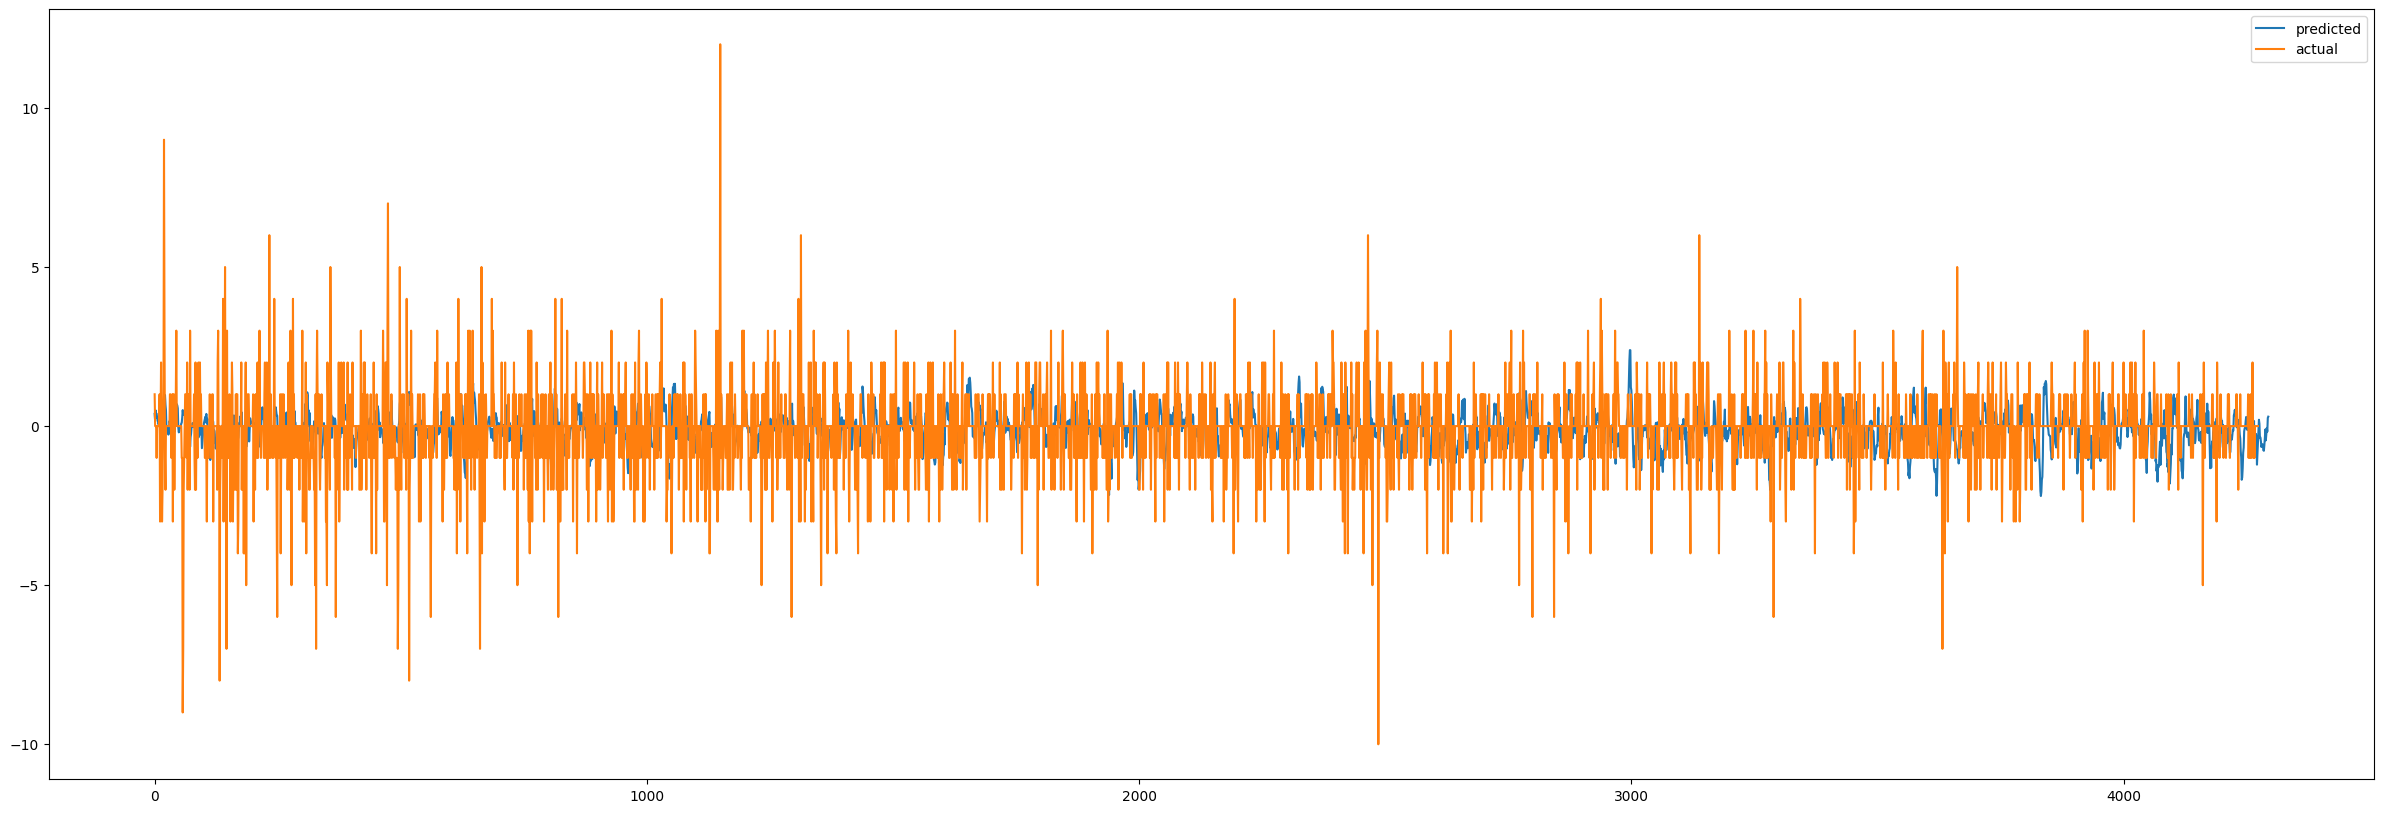

In [8]:
plt.figure(figsize=(30, 10))
plt.plot(pd.DataFrame(pred).reset_index()['predicted_mean'], label='predicted')
plt.plot(actual.reset_index()[actual.columns[0]], label='actual')
plt.legend()

In [ ]:
from google.cloud import storage

In [ ]:
client = storage.Client()
blobs = list(client.get_bucket(BUCKET_NAME).list_blobs(prefix="model"))

In [ ]:
files = [x for x in blobs if x.name.split('-')[-1].split('.')[0]=='abbey_orchard_street__westminster']
files

In [ ]:
latest_blob = max(files, key=lambda x: x.updated)
latest_blob

In [ ]:
latest_blob = max(blobs, key=lambda x: x.updated)
latest_blob

In [ ]:
blobs.sort()